In [43]:
#Importar librerias e instalarlas anteriormente si es necesario
import pandas as pd #Procesamiento del data
import numpy as np #Algebra Lineal o calculos en general
import seaborn as sns #Gráficos BONITOS :D
import matplotlib.pyplot as plt #Graficos basicos grr
from matplotlib.colors import LinearSegmentedColormap

In [8]:
df = pd.read_csv("SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [12]:
#Filas y columnas totales (F,C) shape = estructura
df.shape

(9994, 13)

In [13]:
#Nombre de las columnas
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [14]:
#Muestra columnas con su cantidad de valores nulos y tipo de dato respectivamente 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [15]:
# Descripción básica de datos
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [16]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [17]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

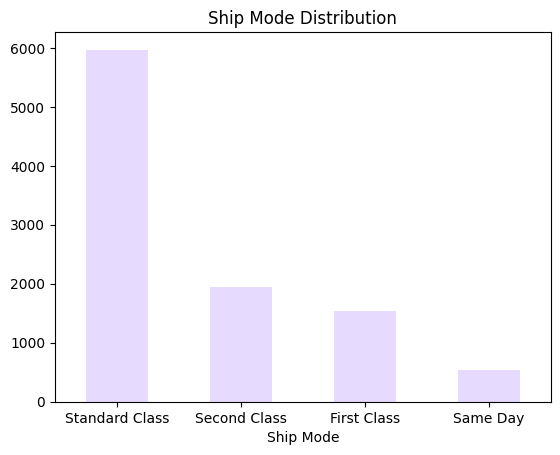

In [35]:
lilac_pastel = ["#E6DAFF"]

df['Ship Mode'].value_counts().plot(kind="bar", color=lilac_pastel)
plt.title("Ship Mode Distribution")
plt.xticks(rotation=0)
plt.show()

In [21]:
#Agrupar ciudad por valor de ganancia (Suma de ganancia) De forma descendente
city_profit=df.groupby("City")['Profit'].sum().sort_values(ascending=False).reset_index().head(10)
display(city_profit)


,City,Profit
0,New York City,62036.9837
1,Los Angeles,30440.7579
2,Seattle,29156.0967
3,San Francisco,17507.3854
4,Detroit,13181.7908
5,Lafayette,10018.3876
6,Jackson,7581.6828
7,Atlanta,6993.6629
8,Minneapolis,6824.5846
9,San Diego,6377.1960


/tmp/ipykernel_2871/1393274345.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_profit, y='City', x='Profit', palette=pastel_diff)


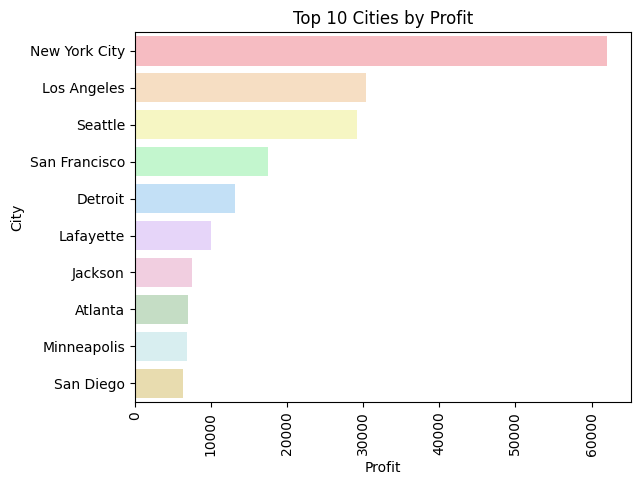

In [29]:
#Gráfico resumen de cada ciudad por el valor de su ganancia
pastel_diff = [
    "#FFB3BA",  # rosa
    "#FFDFBA",  # durazno
    "#FFFFBA",  # amarillo suave
    "#BAFFC9",  # verde menta
    "#BAE1FF",  # celeste
    "#E6CFFF",  # lila
    "#F7C8E0",  # rosado claro
    "#C1E1C1",  # verde pastel
    "#D4F1F4",  # aqua pastel
    "#F1E1A6"   # crema
]

sns.barplot(data=city_profit, y='City', x='Profit', palette=pastel_diff)
plt.title('Top 10 Cities by Profit')
plt.xticks(rotation=90)
plt.show()



In [36]:
#Valor de cada ciudad por su valor de perdida
city_loss=df.groupby("City")['Profit'].sum().sort_values(ascending=False).reset_index().tail(10)
display(city_loss)

,City,Profit
521,Jacksonville,-2323.8350
522,Aurora,-2691.7386
523,Phoenix,-2790.8832
524,Dallas,-2846.5257
525,Burlington,-3622.8772
526,Chicago,-6654.5688
527,Lancaster,-7239.0684
528,San Antonio,-7299.0502
529,Houston,-10153.5485
530,Philadelphia,-13837.7674


/tmp/ipykernel_2871/3409916770.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_loss,y='City',x='Profit',palette=pastel_diff)


<function matplotlib.pyplot.show(close=None, block=None)>

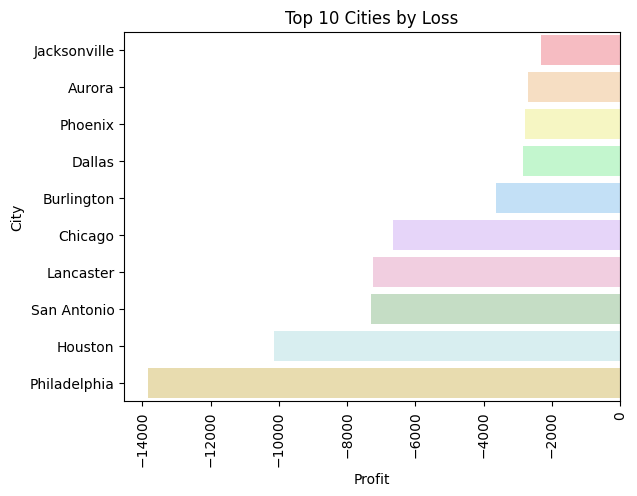

In [38]:
#Gráfico resumen del valor de cada ciudad por su valor de perdida
pastel_diff = [
    "#FFB3BA",  # rosa
    "#FFDFBA",  # durazno
    "#FFFFBA",  # amarillo suave
    "#BAFFC9",  # verde menta
    "#BAE1FF",  # celeste
    "#E6CFFF",  # lila
    "#F7C8E0",  # rosado claro
    "#C1E1C1",  # verde pastel
    "#D4F1F4",  # aqua pastel
    "#F1E1A6"   # crema
]
sns.barplot(data=city_loss,y='City',x='Profit',palette=pastel_diff)
plt.title('Top 10 Cities by Loss')
plt.xticks(rotation=90)
plt.show

In [40]:
#Tabla de cada estado y su ganancia
state_profit=df.groupby("State")['Profit'].sum().sort_values(ascending=False).reset_index()
display(state_profit.head(10))


,State,Profit
0,California,76381.3871
1,New York,74038.5486
2,Washington,33402.6517
3,Michigan,24463.1876
4,Virginia,18597.9504
5,Indiana,18382.9363
6,Georgia,16250.0433
7,Kentucky,11199.6966
8,Minnesota,10823.1874
9,Delaware,9977.3748


/tmp/ipykernel_2871/89021667.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


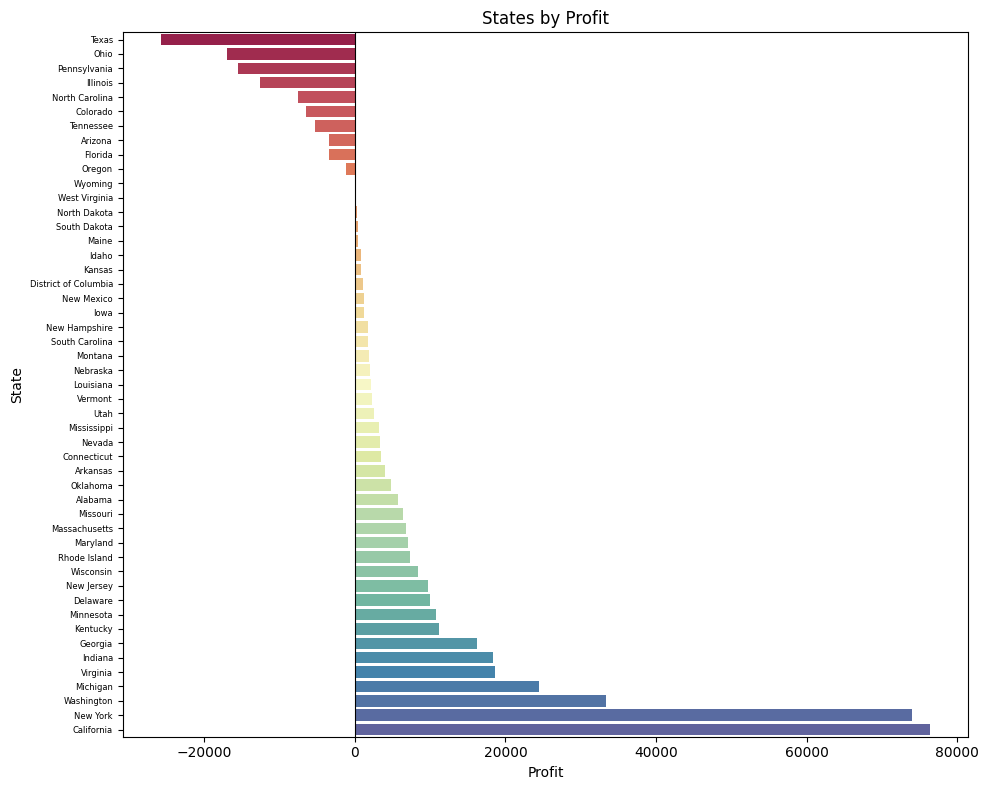

In [41]:
#Gráfico de cada estado y su ganancia o perdida
state_profit_sorted = state_profit.sort_values(by="Profit")

plt.figure(figsize=(10, 8))

sns.barplot(
    data=state_profit_sorted,
    y="State",
    x="Profit",
    palette="Spectral"
)

plt.axvline(0, color="black", linewidth=0.8)

plt.title("States by Profit")
plt.xlabel("Profit")
plt.ylabel("State")
plt.tick_params(axis='y', labelsize=6)

plt.tight_layout()
plt.show()

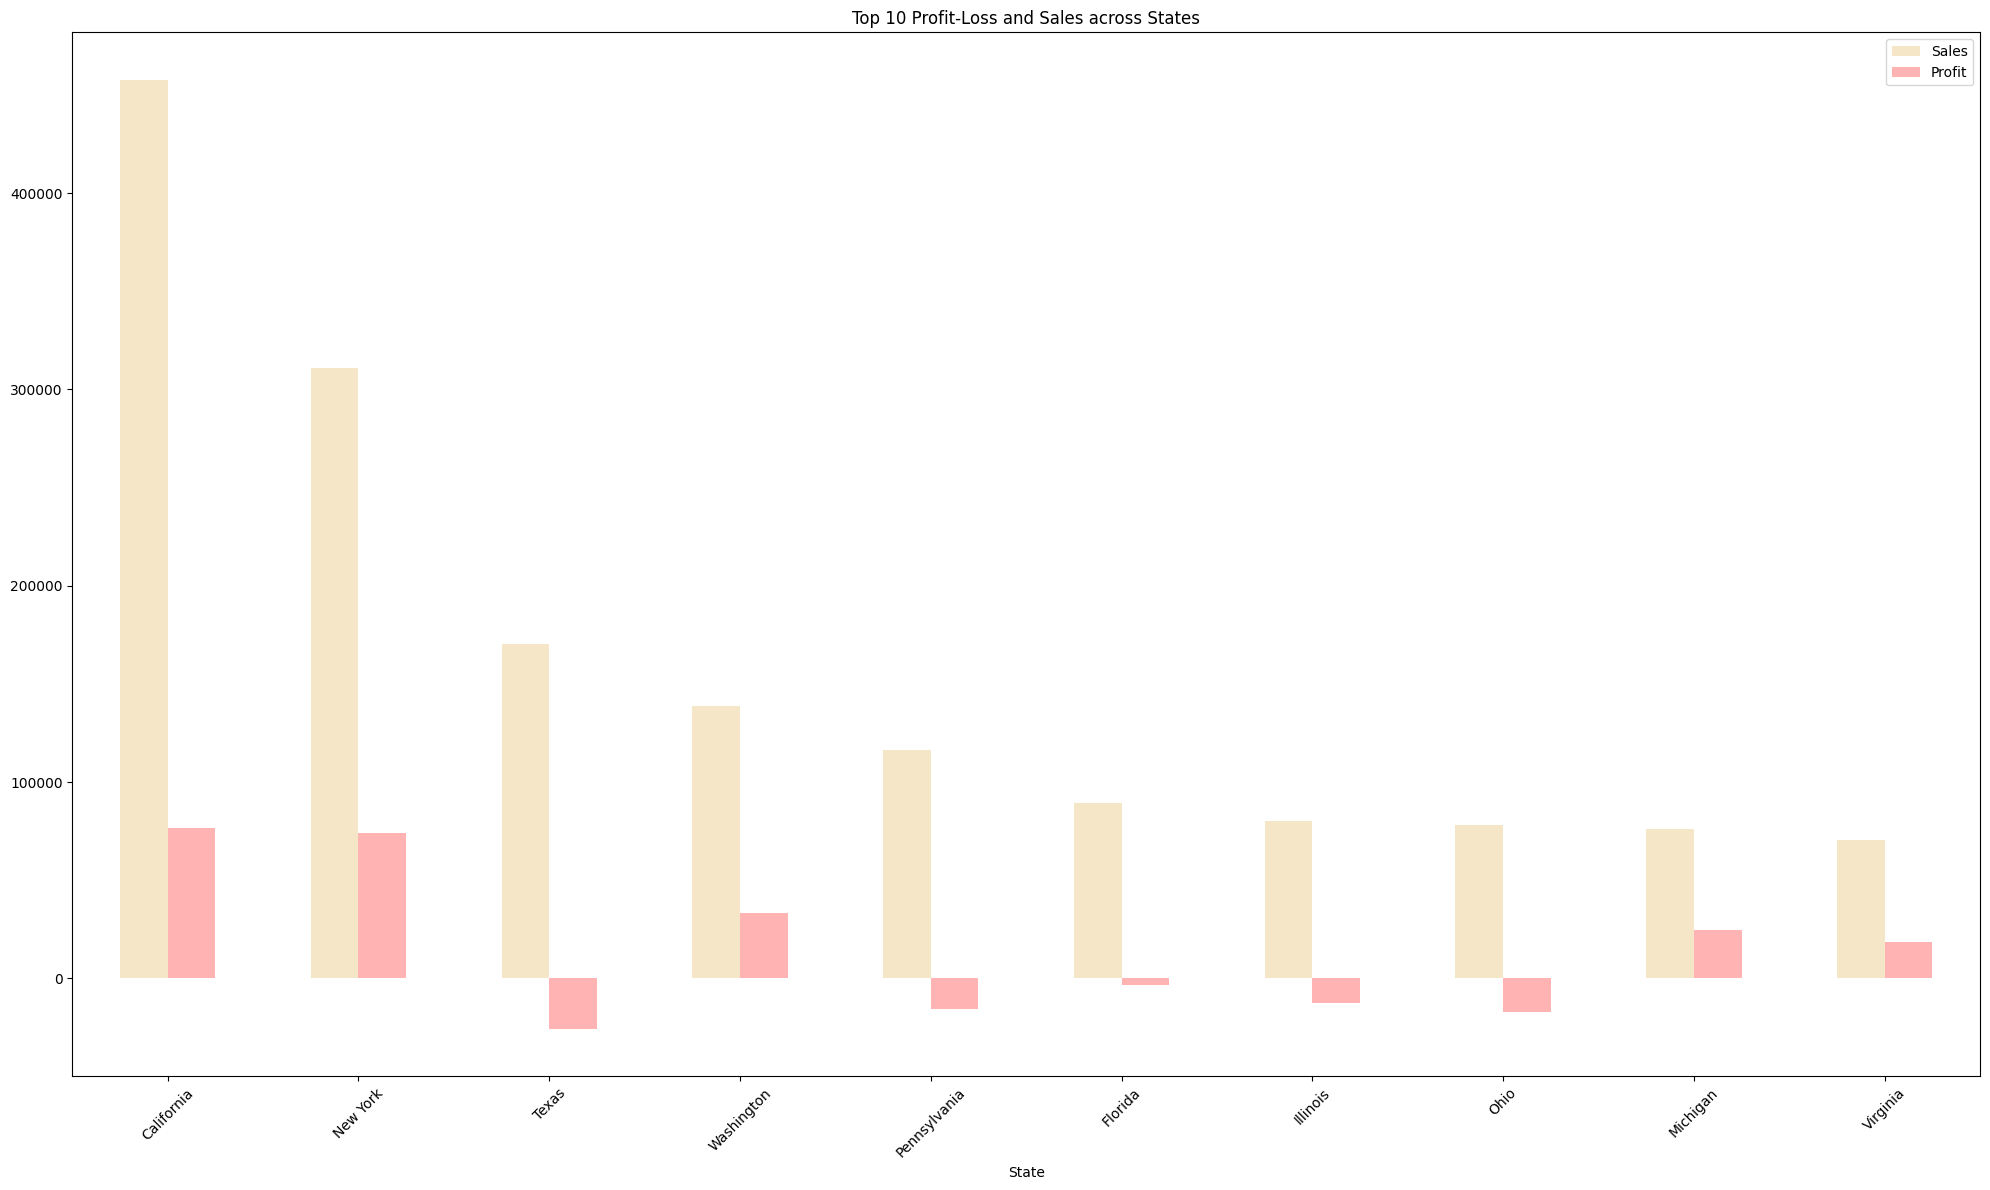

In [51]:
# Top 10 estados con sus ventas y ganancias respectivas
sales_profit = df.groupby("State")[["Sales","Profit"]].sum().sort_values(by="Sales", ascending=False).head(10)

sales_profit.plot.bar(
    color=["#F5E6C8", "#FFB3B3"],  # lila pastel, rojo pastel
    figsize=(20,12)
)

plt.title("Top 10 Profit-Loss and Sales across States")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


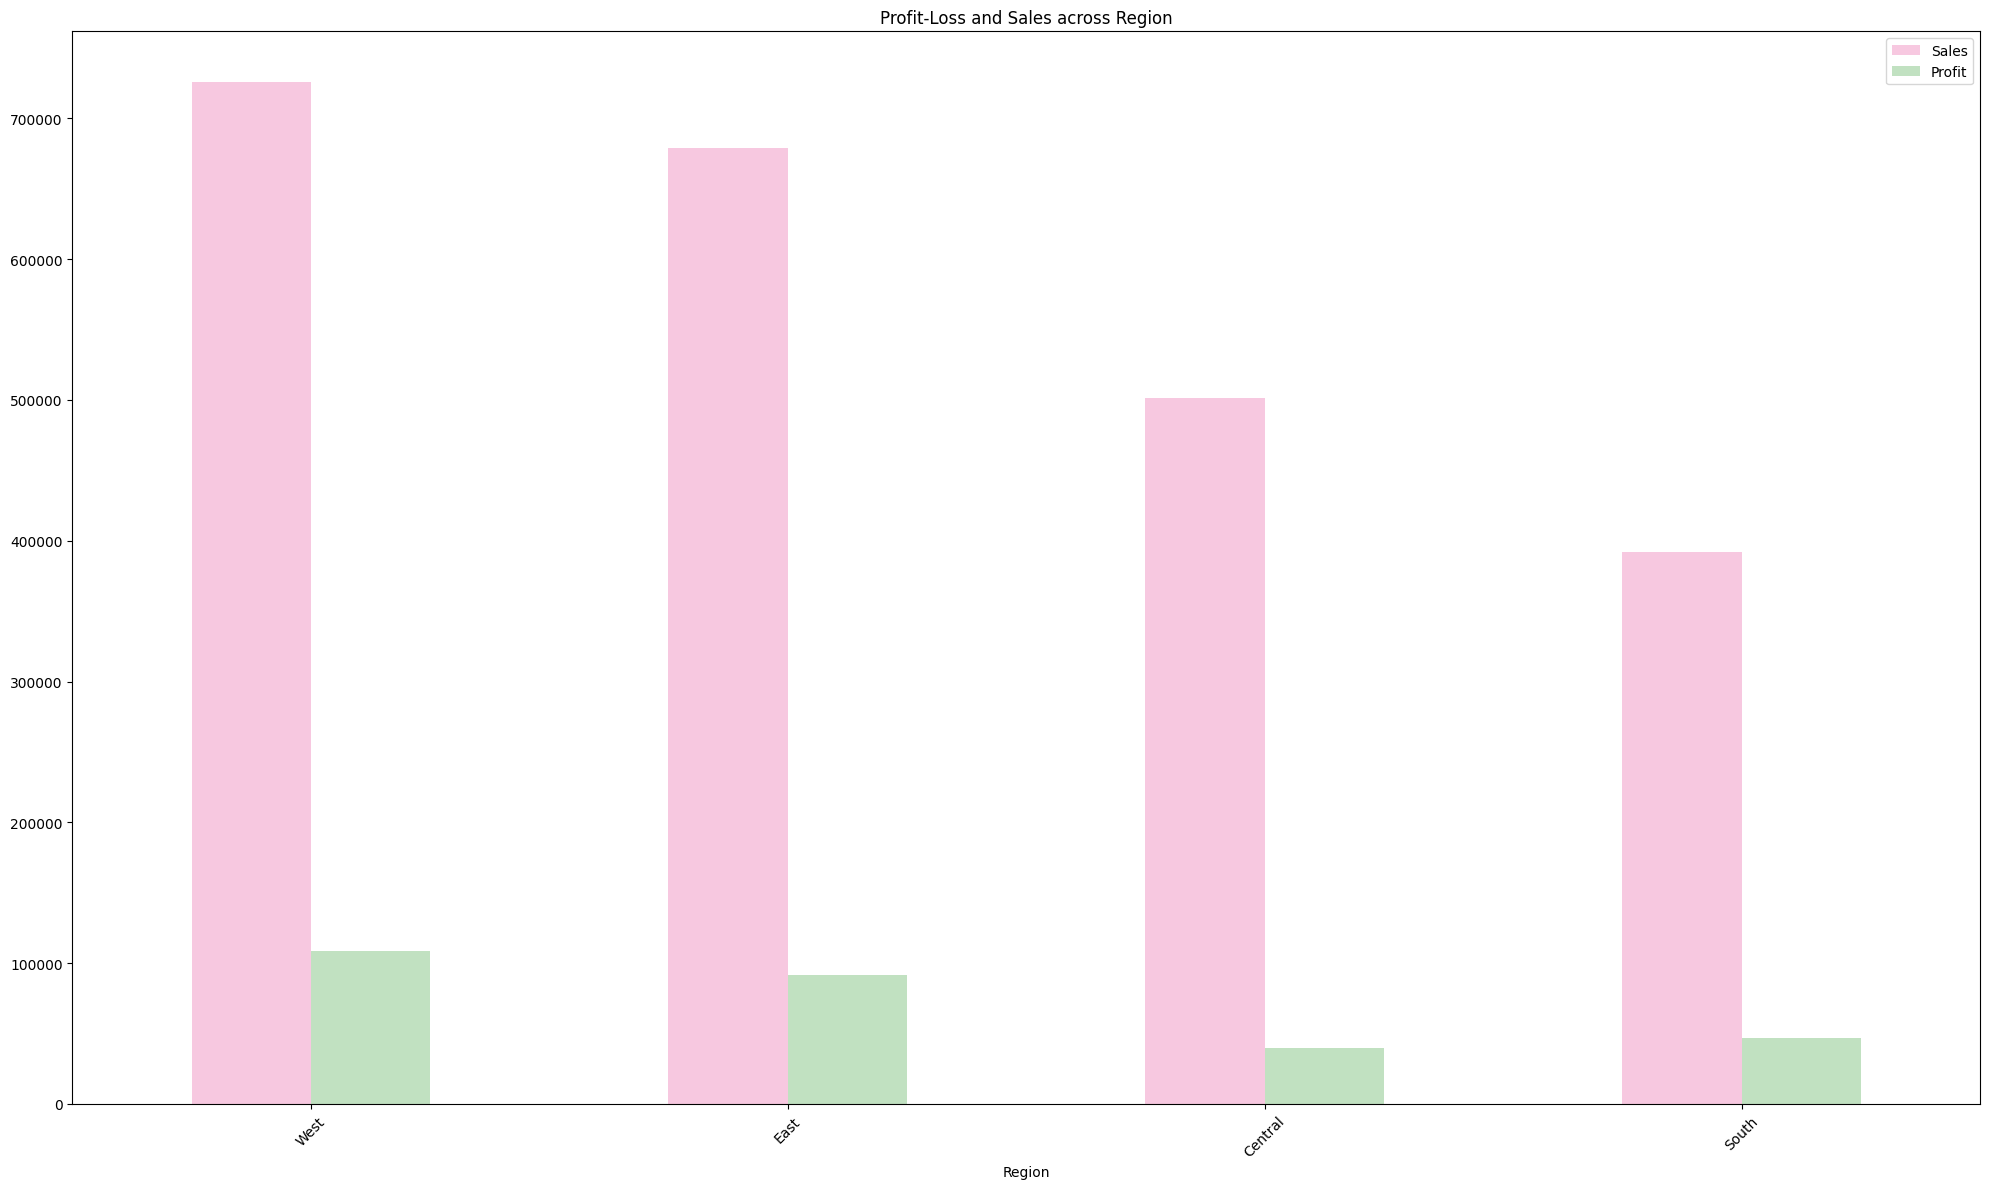

In [69]:
#Ganancia por ventas en cada región
region = df.groupby("Region")[["Sales","Profit"]].sum().sort_values(by="Sales", ascending=False).head(10)

region.plot.bar(
    color=["#F7C8E0", "#C1E1C1"],  
    figsize=(20,12)
)

plt.title("Profit-Loss and Sales across Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [54]:
#Tabla de ventas por categoria de productos
categeory=df.groupby('Category')['Sales'].sum().reset_index()
display(categeory)


,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


/tmp/ipykernel_2871/1094790086.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=categeory,x='Category',y='Sales',palette = pastel_diff)


<function matplotlib.pyplot.show(close=None, block=None)>

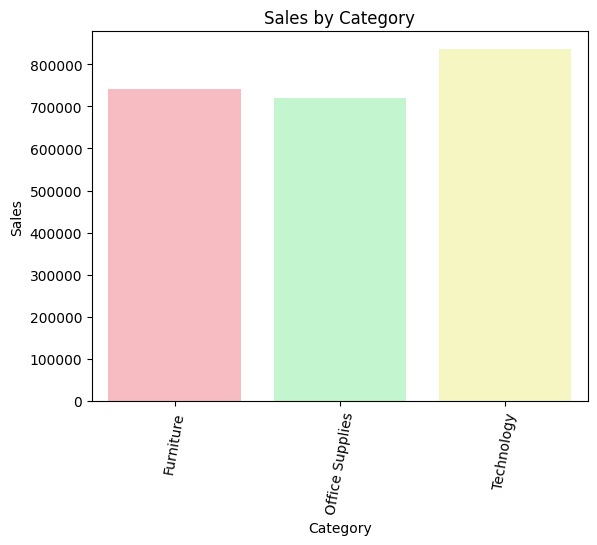

In [59]:
#Grafico de ventas por categoria de productos
pastel_diff = [
    "#FFB3BA",  # rosa
    "#BAFFC9",  # verde
    "#FFFFBA",  # amarillo suave 
]
sns.barplot(data=categeory,x='Category',y='Sales',palette = pastel_diff)
plt.xticks(rotation=80)
plt.title('Sales by Category')
plt.show

In [60]:
#Tabla de categoria y ganancia adquirida
categeory_profit=df.groupby('Category')['Profit'].sum().reset_index()
display(categeory_profit)

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


/tmp/ipykernel_2871/3303219234.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=categeory_profit,x='Category',y='Profit',palette=pastel_diff)


<function matplotlib.pyplot.show(close=None, block=None)>

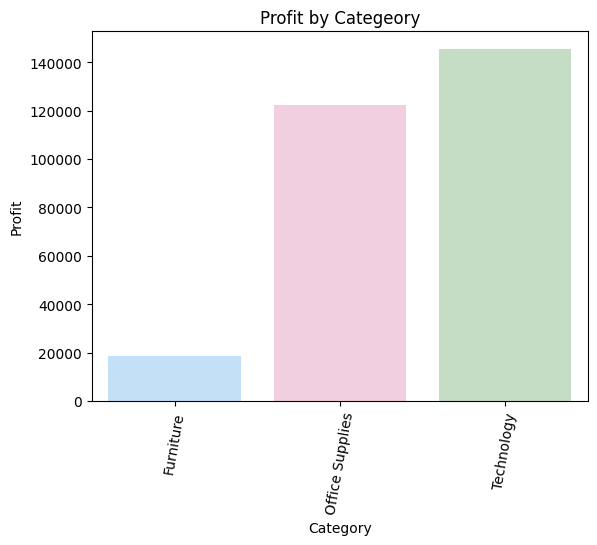

In [64]:
#Tabla de categoria vs ganancia adquirida
pastel_diff = [
    "#BAE1FF", #Celeste pastel
    "#F7C8E0",  #Rosa Pastel
    "#C1E1C1",  #Verde Pastel
] 
sns.barplot(data=categeory_profit,x='Category',y='Profit',palette=pastel_diff)
plt.xticks(rotation=80)
plt.title('Profit by Categeory')
plt.show

In [65]:
#Ventas por sub categoria
sub_cate=df.groupby('Sub-Category')['Sales'].sum().sort_values().reset_index()
display(sub_cate.head(10))

,Sub-Category,Sales
0,Fasteners,3024.2800
1,Labels,12486.3120
2,Envelopes,16476.4020
3,Art,27118.7920
4,Supplies,46673.5380
5,Paper,78479.2060
6,Furnishings,91705.1640
7,Appliances,107532.1610
8,Bookcases,114879.9963
9,Copiers,149528.0300


/tmp/ipykernel_2871/1181537994.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sub_cate, x='Sub-Category', y='Sales', palette=palette)
/tmp/ipykernel_2871/1181537994.py:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=sub_cate, x='Sub-Category', y='Sales', palette=palette)


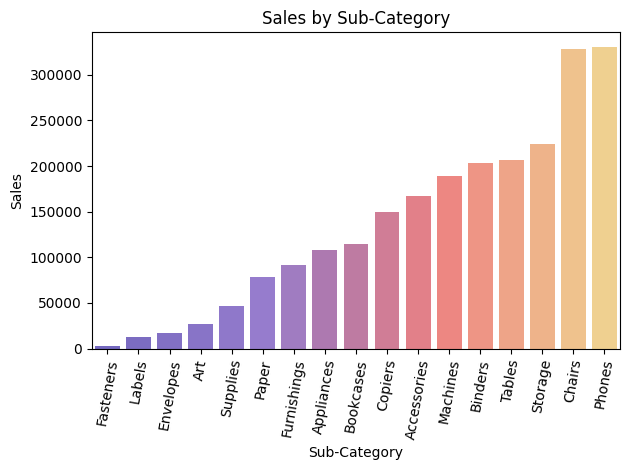

In [71]:
#Grafico de ventas por subcategoria
colors_4 = ["#6A5ACD", "#9370DB", "#FF6F6F", "#FFD580"]

cmap = LinearSegmentedColormap.from_list("custom4_strong", colors_4)
palette = cmap(np.linspace(0, 1, len(sub_cate)))

sns.barplot(data=sub_cate, x='Sub-Category', y='Sales', palette=palette)
plt.xticks(rotation=80)
plt.title('Sales by Sub-Category')
plt.tight_layout()
plt.show()


In [72]:
#Ganancias por subcategoria
sub_cate_prof=df.groupby('Sub-Category')['Profit'].sum().sort_values().reset_index()
display(sub_cate_prof.head(10))

,Sub-Category,Profit
0,Tables,-17725.4811
1,Bookcases,-3472.5560
2,Supplies,-1189.0995
3,Fasteners,949.5182
4,Machines,3384.7569
5,Labels,5546.2540
6,Art,6527.7870
7,Envelopes,6964.1767
8,Furnishings,13059.1436
9,Appliances,18138.0054


/tmp/ipykernel_2871/1811954597.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sub_cate_prof, x='Sub-Category', y='Profit', palette=palette)
/tmp/ipykernel_2871/1811954597.py:6: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(data=sub_cate_prof, x='Sub-Category', y='Profit', palette=palette)


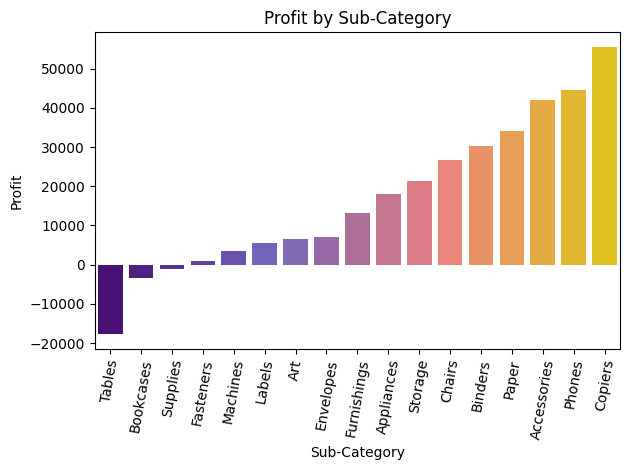

In [73]:
#Grafico de ganancias por subcategoria
colors_contrast = ["#4B0082", "#6A5ACD", "#FF6F6F", "#FFD700"]  # índigo, lila, rojo, amarillo

cmap = LinearSegmentedColormap.from_list("contrast4", colors_contrast)
palette = cmap(np.linspace(0, 1, len(sub_cate_prof)))

sns.barplot(data=sub_cate_prof, x='Sub-Category', y='Profit', palette=palette)
plt.xticks(rotation=80)
plt.title('Profit by Sub-Category')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Between Profit and Discount')

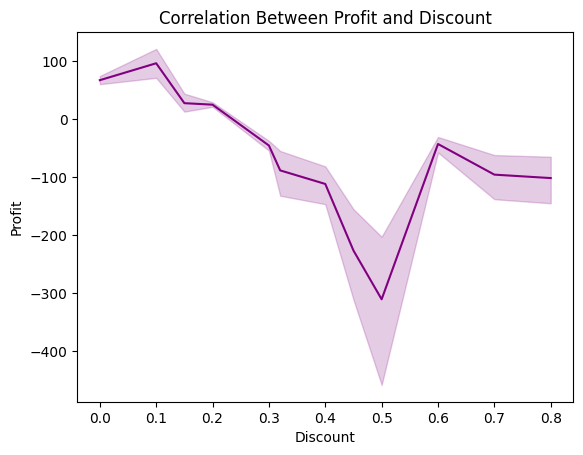

In [80]:
#Correlacion entre ganancia y descuento (Mas descuento menos ganancia)
sns.lineplot(data=df,x='Discount',y='Profit',color='purple')
plt.title('Correlation Between Profit and Discount')

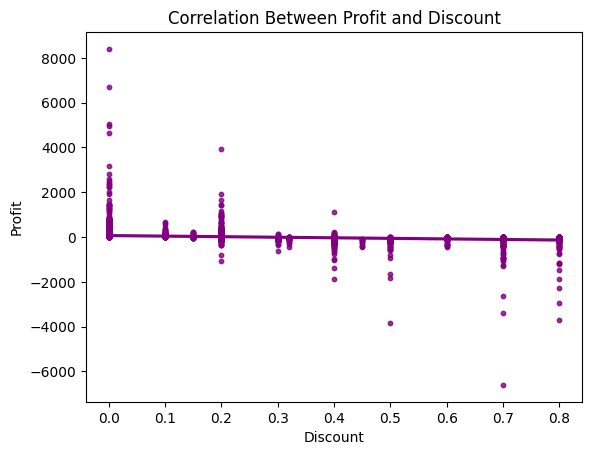

In [81]:

sns.regplot(data=df, x='Discount', y='Profit', scatter_kws={'s': 10},color='purple')
plt.title('Correlation Between Profit and Discount')
plt.show()

Text(0.5, 1.0, 'Correlation Between Sales and Discount')

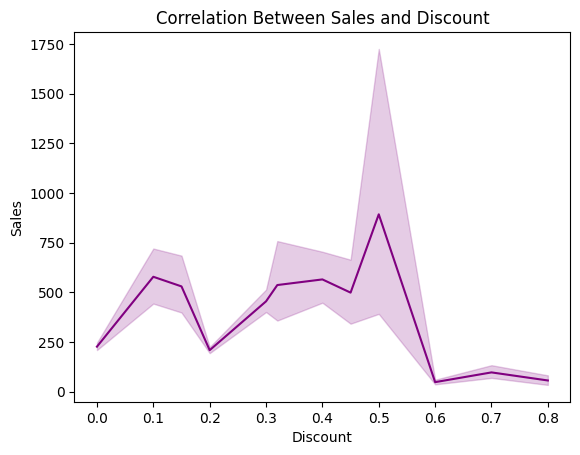

In [82]:
sns.lineplot(data=df,x='Discount',y='Sales',color='purple')
plt.title('Correlation Between Sales and Discount')